# 1. Install Dependencies

## Model - YOLOv8
## type - All In One 
## Dataset - VisDrone
## Test - Extended

In [1]:
!pip install ultralytics
!pip install torch torchvision

import os

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.6/793.6 kB 13.8 MB/s eta 0:00:00


# 2. Dataset Preparation (Annotation)

as the format of annotation is as - object-class,x_center,y_center,width,height (all normalized as this is input format for YOLO5 prediction)

given annotation (in pixel) - bbox_left, bbox_top, bbox_width, bbox_height, score, object_category, truncation, occlusion

In [2]:
import shutil
from sklearn.model_selection import train_test_split
from PIL import Image


os.makedirs('/kaggle/working/yolo_dataset/train', exist_ok=True)
os.makedirs('/kaggle/working/yolo_dataset/val', exist_ok=True)
os.makedirs('/kaggle/working/yolo_dataset/test', exist_ok=True)


os.makedirs('/kaggle/working/yolo_dataset/train/images', exist_ok=True)
os.makedirs('/kaggle/working/yolo_dataset/train/labels', exist_ok=True)

os.makedirs('/kaggle/working/yolo_dataset/val/images', exist_ok=True)
os.makedirs('/kaggle/working/yolo_dataset/val/labels', exist_ok=True)

os.makedirs('/kaggle/working/yolo_dataset/test/images', exist_ok=True)
os.makedirs('/kaggle/working/yolo_dataset/test/labels', exist_ok=True)

In [3]:
# Function to get image dimensions
def get_image_dimensions(image_path):
    with Image.open(image_path) as img:
        return img.width, img.height


# Function to convert annotations
def convert_to_yolo_format(filename, annotations, img_width, img_height):
    with open(os.path.join(output_annotations_path, filename), 'w') as out_file:
        for annotation in annotations:
            if len(annotation) != 8:
                print(f"Error parsing annotation in {filename}: {annotation}")
                print(f"Ignoring malformed annotation: {annotation}")
                continue
            x_min, y_min, width, height, score, class_id, truncation, occlusion = map(float, annotation)
            if(class_id==0):
                continue
            # Convert to YOLO format
            center_x = x_min + (width / 2.0)
            center_y = y_min + (height / 2.0)
            center_x /= img_width
            center_y /= img_height
            width /= img_width
            height /= img_height
            class_id = class_id -1
            out_file.write(f"{int(class_id)} {center_x} {center_y} {width} {height}\n")

## for train (from visdrone )

In [4]:
# Paths to the dataset
annotations_path = '/kaggle/input/visdrone-dataset/VisDrone2019-DET-train/VisDrone2019-DET-train/annotations'
images_path = '/kaggle/input/visdrone-dataset/VisDrone2019-DET-train/VisDrone2019-DET-train/images'
output_dataset_path = '/kaggle/working/yolo_dataset'
output_annotations_path = os.path.join(output_dataset_path, 'train/labels')
output_images_path = os.path.join(output_dataset_path, 'train/images')


os.makedirs(output_annotations_path, exist_ok=True)
os.makedirs(output_images_path, exist_ok=True)


# Process all annotation files
for annotation_file in os.listdir(annotations_path):
    image_file = annotation_file.replace('.txt', '.jpg')
    image_path = os.path.join(images_path, image_file)
    
    if not os.path.exists(image_path):
        continue

    img_width, img_height = get_image_dimensions(image_path)

    with open(os.path.join(annotations_path, annotation_file), 'r') as file:
        lines = file.readlines()
        annotations = [line.strip().split(',') for line in lines]
        convert_to_yolo_format(annotation_file, annotations, img_width, img_height)
        
        # Copy the image to the new dataset location
        output_image_path = os.path.join(output_images_path, image_file)
        if not os.path.exists(output_image_path):
            Image.open(image_path).save(output_image_path)


Error parsing annotation in 9999974_00000_d_0000053.txt: ['440', '541', '271', '152', '1', '6', '0', '0', '']
Ignoring malformed annotation: ['440', '541', '271', '152', '1', '6', '0', '0', '']
Error parsing annotation in 9999974_00000_d_0000053.txt: ['436', '772', '134', '72', '1', '5', '0', '0', '']
Ignoring malformed annotation: ['436', '772', '134', '72', '1', '5', '0', '0', '']
Error parsing annotation in 9999974_00000_d_0000053.txt: ['601', '713', '60', '39', '1', '10', '0', '0', '']
Ignoring malformed annotation: ['601', '713', '60', '39', '1', '10', '0', '0', '']
Error parsing annotation in 9999974_00000_d_0000053.txt: ['486', '706', '102', '59', '1', '8', '0', '0', '']
Ignoring malformed annotation: ['486', '706', '102', '59', '1', '8', '0', '0', '']
Error parsing annotation in 9999974_00000_d_0000053.txt: ['397', '978', '167', '90', '1', '4', '0', '0', '']
Ignoring malformed annotation: ['397', '978', '167', '90', '1', '4', '0', '0', '']
Error parsing annotation in 9999974_00

## for val (from visdrone )

In [5]:
# Paths to the dataset
annotations_path = '/kaggle/input/visdrone-dataset/VisDrone2019-DET-val/VisDrone2019-DET-val/annotations'
images_path = '/kaggle/input/visdrone-dataset/VisDrone2019-DET-val/VisDrone2019-DET-val/images'
output_dataset_path = '/kaggle/working/yolo_dataset'
output_annotations_path = os.path.join(output_dataset_path, 'val/labels')
output_images_path = os.path.join(output_dataset_path, 'val/images')


os.makedirs(output_annotations_path, exist_ok=True)
os.makedirs(output_images_path, exist_ok=True)


# Process all annotation files
for annotation_file in os.listdir(annotations_path):
    image_file = annotation_file.replace('.txt', '.jpg')
    image_path = os.path.join(images_path, image_file)
    
    if not os.path.exists(image_path):
        continue

    img_width, img_height = get_image_dimensions(image_path)

    with open(os.path.join(annotations_path, annotation_file), 'r') as file:
        lines = file.readlines()
        annotations = [line.strip().split(',') for line in lines]
        convert_to_yolo_format(annotation_file, annotations, img_width, img_height)
        
        # Copy the image to the new dataset location
        output_image_path = os.path.join(output_images_path, image_file)
        if not os.path.exists(output_image_path):
            Image.open(image_path).save(output_image_path)


## for test dataset (from visDrone)

In [6]:
# Paths to the dataset
annotations_path = '/kaggle/input/visdrone-dataset/VisDrone2019-DET-test-dev/VisDrone2019-DET-test-dev/annotations'
images_path = '/kaggle/input/visdrone-dataset/VisDrone2019-DET-test-dev/VisDrone2019-DET-test-dev/images'
output_dataset_path = '/kaggle/working/yolo_dataset'
output_annotations_path = os.path.join(output_dataset_path, 'test/labels')
output_images_path = os.path.join(output_dataset_path, 'test/images')


os.makedirs(output_annotations_path, exist_ok=True)
os.makedirs(output_images_path, exist_ok=True)


# Process all annotation files
for annotation_file in os.listdir(annotations_path):
    image_file = annotation_file.replace('.txt', '.jpg')
    image_path = os.path.join(images_path, image_file)
    
    if not os.path.exists(image_path):
        continue

    img_width, img_height = get_image_dimensions(image_path)

    with open(os.path.join(annotations_path, annotation_file), 'r') as file:
        lines = file.readlines()
        annotations = [line.strip().split(',') for line in lines]
        convert_to_yolo_format(annotation_file, annotations, img_width, img_height)
        
        # Copy the image to the new dataset location
        output_image_path = os.path.join(output_images_path, image_file)
        if not os.path.exists(output_image_path):
            Image.open(image_path).save(output_image_path)

            


## for test dataset (from extended)

In [7]:
# Paths to the dataset
annotations_path = '/kaggle/input/extended-dataset/Expanded_dataset/annotations'
images_path = '/kaggle/input/extended-dataset/Expanded_dataset/images'
output_dataset_path = '/kaggle/working/yolo_dataset'
output_annotations_path = os.path.join(output_dataset_path, 'test_ext/labels')
output_images_path = os.path.join(output_dataset_path, 'test_ext/images')


os.makedirs(output_annotations_path, exist_ok=True)
os.makedirs(output_images_path, exist_ok=True)


# Process all annotation files
for annotation_file in os.listdir(annotations_path):
    image_file = annotation_file.replace('.txt', '.jpg')
    image_path = os.path.join(images_path, image_file)
    
    if not os.path.exists(image_path):
        continue

    img_width, img_height = get_image_dimensions(image_path)

    with open(os.path.join(annotations_path, annotation_file), 'r') as file:
        lines = file.readlines()
        annotations = [line.strip().split(',') for line in lines]
        convert_to_yolo_format(annotation_file, annotations, img_width, img_height)
        
        # Copy the image to the new dataset location
        output_image_path = os.path.join(output_images_path, image_file)
        if not os.path.exists(output_image_path):
            Image.open(image_path).save(output_image_path)


# 3. Create a Dataset Configuration File

In [8]:
# individual added

# 4. Training Yolov8s

# epoch = 10

## Train visdrone epoch = 10  

In [9]:
data_config = """
train: /kaggle/working/yolo_dataset/train/images
val: /kaggle/working/yolo_dataset/val/images
test: /kaggle/working/yolo_dataset/test/images

nc: 11  # number of classes (modify according to your dataset)
names: ['pedestrian', 'people', 'bicycle', 'car', 'van', 'truck', 'tricycle', 'awning-tricycle', 'bus', 'motor', 'others']  # class names (modify according to your dataset)
"""

with open('/kaggle/working/yolo_dataset/data.yaml', 'w') as file:
    file.write(data_config)

    
# test: /kaggle/working/yolo_dataset/test_ext/images

import wandb
!export WANDB_MODE=disabled
wandb.init(mode="disabled")


from ultralytics import YOLO

# Load a YOLOv8 model
model = YOLO('/kaggle/working/yolov8n.pt')  # You can also use yolov8m.pt, yolov8l.pt, etc.

# Train the model
results = model.train(data='/kaggle/working/yolo_dataset/data.yaml', epochs=10, imgsz=640, batch=16)


100%|██████████| 6.23M/6.23M [00:00<00:00, 75.3MB/s]


Ultralytics YOLOv8.2.45 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=detect, mode=train, model=/kaggle/working/yolov8n.pt, data=/kaggle/working/yolo_dataset/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_

100%|██████████| 755k/755k [00:00<00:00, 14.4MB/s]
2024-06-27 12:54:13,109	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-06-27 12:54:14,695	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=11

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /kaggle/working/yolo_dataset/train/labels... 6471 images, 1 backgrounds, 0 corrupt: 100%|██████████| 6471/6471 [00:06<00:00, 1017.13it/s]

train: WARNING ⚠️ /kaggle/working/yolo_dataset/train/images/0000137_02220_d_0000163.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /kaggle/working/yolo_dataset/train/images/0000140_00118_d_0000002.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /kaggle/working/yolo_dataset/train/images/9999945_00000_d_0000114.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /kaggle/working/yolo_dataset/train/images/9999987_00000_d_0000049.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /kaggle/working/yolo_dataset/train/images/9999998_00219_d_0000175.jpg: 1 duplicate labels removed


train: New cache created: /kaggle/working/yolo_dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/working/yolo_dataset/val/labels... 548 images, 0 backgrounds, 0 corrupt: 100%|██████████| 548/548 [00:00<00:00, 834.26it/s]


val: New cache created: /kaggle/working/yolo_dataset/val/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      8.25G      1.813      2.413      1.035        412        640: 100%|██████████| 405/405 [01:38<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.25it/s]


                   all        548      38791      0.276      0.163      0.117     0.0619

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      8.01G      1.669      1.589     0.9974        298        640: 100%|██████████| 405/405 [01:25<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.21it/s]

                   all        548      38791      0.314      0.173      0.146     0.0789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      7.68G      1.624      1.465     0.9874        397        640: 100%|██████████| 405/405 [01:23<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.03it/s]

                   all        548      38791      0.226      0.198      0.164     0.0892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      6.31G      1.598      1.384     0.9772        257        640: 100%|██████████| 405/405 [01:22<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.08it/s]

                   all        548      38791      0.342      0.219      0.183      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      7.59G       1.55      1.308     0.9687        292        640: 100%|██████████| 405/405 [01:22<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.33it/s]

                   all        548      38791      0.281      0.223      0.195       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      7.69G      1.534      1.266      0.963        407        640: 100%|██████████| 405/405 [01:23<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.38it/s]

                   all        548      38791      0.321      0.229      0.215      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      8.22G      1.506      1.222     0.9548        395        640: 100%|██████████| 405/405 [01:23<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  4.55it/s]

                   all        548      38791      0.394      0.234      0.215      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      9.25G      1.497      1.202     0.9519        469        640: 100%|██████████| 405/405 [01:22<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.33it/s]

                   all        548      38791       0.31      0.238      0.222      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      7.39G      1.474       1.17     0.9475        341        640: 100%|██████████| 405/405 [01:22<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.24it/s]

                   all        548      38791      0.305      0.249      0.226      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      7.27G      1.464       1.15     0.9435        251        640: 100%|██████████| 405/405 [01:23<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.31it/s]

                   all        548      38791      0.324      0.247      0.235      0.135



10 epochs completed in 0.252 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.45 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 3007793 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]


                   all        548      38791      0.325      0.247      0.235      0.135
            pedestrian        520       8844      0.334      0.307      0.269      0.111
                people        482       5125      0.433      0.184      0.207       0.07
               bicycle        364       1287      0.181     0.0567      0.042     0.0141
                   car        515      14064      0.536      0.704      0.683       0.45
                   van        421       1975      0.372      0.283      0.277      0.188
                 truck        266        750      0.354      0.256      0.237      0.164
              tricycle        337       1045      0.345      0.174      0.163     0.0854
       awning-tricycle        220        532      0.202      0.115     0.0794     0.0516
                   bus        131        251      0.468      0.355      0.368      0.247
                 motor        485       4886      0.351      0.288      0.249     0.0931
                other

## test visdrone epoch = 10  

In [10]:
test_results = model.val(data='/kaggle/working/yolo_dataset/data.yaml', split='test')

Ultralytics YOLOv8.2.45 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 3007793 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /kaggle/working/yolo_dataset/test/labels... 1610 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1610/1610 [00:01<00:00, 975.64it/s]


val: New cache created: /kaggle/working/yolo_dataset/test/labels.cache


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 101/101 [00:50<00:00,  2.01it/s]


                   all       1610      75367      0.288      0.227      0.198       0.11
            pedestrian       1197      21006      0.332      0.192      0.176     0.0682
                people        797       6376      0.341     0.0693     0.0845     0.0271
               bicycle        377       1302       0.19     0.0323      0.038     0.0136
                   car       1530      28074      0.528      0.634      0.599      0.356
                   van       1168       5771      0.269      0.311      0.233      0.144
                 truck        750       2659      0.273      0.347      0.262      0.156
              tricycle        245        530      0.182      0.147     0.0788      0.037
       awning-tricycle        233        599      0.257      0.107     0.0921      0.049
                   bus        838       2940      0.509      0.457      0.451      0.301
                 motor        794       5845      0.284      0.197       0.15     0.0554
                other

## Test extended/custom Epoch=10

In [11]:
data_config = """
train: /kaggle/working/yolo_dataset/train/images
val: /kaggle/working/yolo_dataset/test_ext/images

nc: 11  # number of classes (modify according to your dataset)
names: ['pedestrian', 'people', 'bicycle', 'car', 'van', 'truck', 'tricycle', 'awning-tricycle', 'bus', 'motor', 'others']  # class names (modify according to your dataset)
"""

with open('/kaggle/working/yolo_dataset/data.yaml', 'w') as file:
    file.write(data_config)
    
    
# Load the best model
model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')


# Evaluate the model on the new dataset
test_results = model.val(data='/kaggle/working/yolo_dataset/data.yaml', split='val')

Ultralytics YOLOv8.2.45 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 3007793 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /kaggle/working/yolo_dataset/test_ext/labels... 1301 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1301/1301 [00:01<00:00, 1121.21it/s]

val: New cache created: /kaggle/working/yolo_dataset/test_ext/labels.cache



/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 82/82 [00:24<00:00,  3.37it/s]


                   all       1301      46645       0.16      0.143      0.109     0.0566
            pedestrian        929      13460      0.286     0.0398     0.0432     0.0199
                people        593       4438     0.0225   0.000451    0.00773    0.00237
               bicycle        269        828     0.0495    0.00121   0.000955   0.000299
                   car       1215      16619      0.535        0.5      0.475      0.199
                   van        848       3415      0.228      0.172       0.13     0.0684
                 truck        488       1402      0.119      0.257      0.101      0.054
              tricycle        168        338      0.103     0.0828     0.0343     0.0148
       awning-tricycle        160        390     0.0498     0.0231     0.0164    0.00678
                   bus        583       1640      0.262      0.484      0.356      0.246
                 motor        577       3944      0.104     0.0167     0.0269    0.00939
                other

# Epoch = 25

In [12]:
data_config = """
train: /kaggle/working/yolo_dataset/train/images
val: /kaggle/working/yolo_dataset/val/images
test: /kaggle/working/yolo_dataset/test/images

nc: 11  # number of classes (modify according to your dataset)
names: ['pedestrian', 'people', 'bicycle', 'car', 'van', 'truck', 'tricycle', 'awning-tricycle', 'bus', 'motor', 'others']  # class names (modify according to your dataset)
"""

with open('/kaggle/working/yolo_dataset/data.yaml', 'w') as file:
    file.write(data_config)

    
# test: /kaggle/working/yolo_dataset/test_ext/images

import wandb
!export WANDB_MODE=disabled
wandb.init(mode="disabled")


from ultralytics import YOLO

# Load a YOLOv8 model
model = YOLO('/kaggle/working/runs/detect/train/weights/last.pt')  # You can also use yolov8m.pt, yolov8l.pt, etc.

# Train the model 10prev + 15 new = 25
results = model.train(data='/kaggle/working/yolo_dataset/data.yaml', epochs=15, imgsz=640, batch=16)


/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Ultralytics YOLOv8.2.45 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=detect, mode=train, model=/kaggle/working/runs/detect/train/weights/last.pt, data=/kaggle/working/yolo_dataset/data.yaml, epochs=15, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False

train: Scanning /kaggle/working/yolo_dataset/train/labels.cache... 6471 images, 1 backgrounds, 0 corrupt: 100%|██████████| 6471/6471 [00:00<?, ?it/s]

train: WARNING ⚠️ /kaggle/working/yolo_dataset/train/images/0000137_02220_d_0000163.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /kaggle/working/yolo_dataset/train/images/0000140_00118_d_0000002.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /kaggle/working/yolo_dataset/train/images/9999945_00000_d_0000114.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /kaggle/working/yolo_dataset/train/images/9999987_00000_d_0000049.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /kaggle/working/yolo_dataset/train/images/9999998_00219_d_0000175.jpg: 1 duplicate labels removed
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/working/yolo_dataset/val/labels.cache... 548 images, 0 backgrounds, 0 corrupt: 100%|██████████| 548/548 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train3
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15      6.69G      1.538      1.232     0.9571       1061        640: 100%|██████████| 405/405 [02:16<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.42it/s]

                   all        548      38791      0.388      0.249      0.225      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15      5.67G      1.542      1.236     0.9585        566        640: 100%|██████████| 405/405 [01:30<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.39it/s]

                   all        548      38791       0.29      0.238      0.218      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15      8.84G      1.554      1.237     0.9581        594        640: 100%|██████████| 405/405 [01:29<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.41it/s]

                   all        548      38791      0.402      0.241      0.222      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15      5.79G      1.539      1.226      0.956        499        640: 100%|██████████| 405/405 [01:29<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.38it/s]


                   all        548      38791      0.386      0.243      0.228      0.127

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15      7.99G      1.524      1.198     0.9535        562        640: 100%|██████████| 405/405 [01:28<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.41it/s]

                   all        548      38791      0.405      0.249      0.235      0.132


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15      8.86G      1.493      1.172     0.9507        392        640: 100%|██████████| 405/405 [01:35<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.42it/s]

                   all        548      38791      0.416      0.243      0.236      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15      7.81G      1.466      1.137     0.9448        374        640: 100%|██████████| 405/405 [01:23<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  4.55it/s]

                   all        548      38791      0.327      0.248      0.229      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15      5.91G      1.457      1.125     0.9432        433        640: 100%|██████████| 405/405 [01:23<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.24it/s]

                   all        548      38791      0.338      0.247      0.236      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15      7.06G      1.447      1.103     0.9392        333        640: 100%|██████████| 405/405 [01:23<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.27it/s]


                   all        548      38791      0.319      0.265      0.246      0.138

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15      6.64G      1.437      1.089     0.9374        270        640: 100%|██████████| 405/405 [01:23<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.39it/s]

                   all        548      38791      0.333      0.274      0.256      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15      8.76G      1.427      1.073     0.9351        343        640: 100%|██████████| 405/405 [01:23<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  4.56it/s]

                   all        548      38791      0.345      0.275      0.254      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15      6.59G      1.415      1.059     0.9321        237        640: 100%|██████████| 405/405 [01:23<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.45it/s]


                   all        548      38791      0.351      0.279      0.259      0.147

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15      8.51G      1.406      1.048     0.9294        279        640: 100%|██████████| 405/405 [01:23<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.43it/s]

                   all        548      38791      0.356      0.268       0.26      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15      8.72G        1.4      1.034     0.9286        601        640: 100%|██████████| 405/405 [01:23<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.48it/s]

                   all        548      38791      0.364      0.278      0.265       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15      6.68G      1.387       1.02     0.9245        151        640: 100%|██████████| 405/405 [01:23<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.23it/s]

                   all        548      38791       0.35      0.275      0.265      0.151



15 epochs completed in 0.396 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 6.2MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics YOLOv8.2.45 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 3007793 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.48s/it]


                   all        548      38791       0.35      0.275      0.265      0.151
            pedestrian        520       8844      0.382      0.317        0.3      0.126
                people        482       5125      0.451      0.213      0.235     0.0813
               bicycle        364       1287      0.195     0.0948      0.059     0.0204
                   car        515      14064      0.574      0.723      0.715      0.478
                   van        421       1975      0.423      0.323      0.321      0.219
                 truck        266        750      0.405      0.268      0.268      0.178
              tricycle        337       1045      0.349      0.211       0.19      0.101
       awning-tricycle        220        532      0.201       0.16      0.103     0.0649
                   bus        131        251      0.457      0.386      0.402      0.267
                 motor        485       4886      0.417      0.326      0.302      0.118
                other

In [13]:
test_results = model.val(data='/kaggle/working/yolo_dataset/data.yaml', split='test')

Ultralytics YOLOv8.2.45 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 3007793 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /kaggle/working/yolo_dataset/test/labels.cache... 1610 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1610/1610 [00:00<?, ?it/s]
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 101/101 [00:50<00:00,  2.01it/s]


                   all       1610      75367      0.352      0.249      0.223      0.125
            pedestrian       1197      21006      0.395      0.194      0.194     0.0748
                people        797       6376      0.403     0.0725      0.101     0.0333
               bicycle        377       1302      0.223     0.0622     0.0567     0.0211
                   car       1530      28074      0.558       0.65      0.626      0.377
                   van       1168       5771      0.287      0.343      0.256       0.16
                 truck        750       2659      0.345      0.357      0.301      0.185
              tricycle        245        530      0.213      0.191      0.102     0.0517
       awning-tricycle        233        599      0.262      0.153      0.118     0.0642
                   bus        838       2940      0.527      0.481       0.48      0.324
                 motor        794       5845      0.329      0.224      0.185     0.0665
                other

In [14]:
data_config = """
train: /kaggle/working/yolo_dataset/train/images
val: /kaggle/working/yolo_dataset/test_ext/images

nc: 11  # number of classes (modify according to your dataset)
names: ['pedestrian', 'people', 'bicycle', 'car', 'van', 'truck', 'tricycle', 'awning-tricycle', 'bus', 'motor', 'others']  # class names (modify according to your dataset)
"""

with open('/kaggle/working/yolo_dataset/data.yaml', 'w') as file:
    file.write(data_config)
    
    
# Load the best model
model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')


# Evaluate the model on the new dataset
test_results = model.val(data='/kaggle/working/yolo_dataset/data.yaml', split='val')

Ultralytics YOLOv8.2.45 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 3007793 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /kaggle/working/yolo_dataset/test_ext/labels.cache... 1301 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1301/1301 [00:00<?, ?it/s]
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 82/82 [00:23<00:00,  3.50it/s]


                   all       1301      46645       0.16      0.143      0.109     0.0566
            pedestrian        929      13460      0.286     0.0398     0.0432     0.0199
                people        593       4438     0.0225   0.000451    0.00773    0.00237
               bicycle        269        828     0.0495    0.00121   0.000955   0.000299
                   car       1215      16619      0.535        0.5      0.475      0.199
                   van        848       3415      0.228      0.172       0.13     0.0684
                 truck        488       1402      0.119      0.257      0.101      0.054
              tricycle        168        338      0.103     0.0828     0.0343     0.0148
       awning-tricycle        160        390     0.0498     0.0231     0.0164    0.00678
                   bus        583       1640      0.262      0.484      0.356      0.246
                 motor        577       3944      0.104     0.0167     0.0269    0.00939
                other

# Epoch = 50

In [15]:
data_config = """
train: /kaggle/working/yolo_dataset/train/images
val: /kaggle/working/yolo_dataset/val/images
test: /kaggle/working/yolo_dataset/test/images

nc: 11  # number of classes (modify according to your dataset)
names: ['pedestrian', 'people', 'bicycle', 'car', 'van', 'truck', 'tricycle', 'awning-tricycle', 'bus', 'motor', 'others']  # class names (modify according to your dataset)
"""

with open('/kaggle/working/yolo_dataset/data.yaml', 'w') as file:
    file.write(data_config)

    
# test: /kaggle/working/yolo_dataset/test_ext/images

import wandb
!export WANDB_MODE=disabled
wandb.init(mode="disabled")


from ultralytics import YOLO

# Load a YOLOv8 model
model = YOLO('/kaggle/working/runs/detect/train/weights/last.pt')  # You can also use yolov8m.pt, yolov8l.pt, etc.

# Train the model 25prev + 25 new = 50
results = model.train(data='/kaggle/working/yolo_dataset/data.yaml', epochs=25, imgsz=640, batch=16)


/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Ultralytics YOLOv8.2.45 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=detect, mode=train, model=/kaggle/working/runs/detect/train/weights/last.pt, data=/kaggle/working/yolo_dataset/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False

train: Scanning /kaggle/working/yolo_dataset/train/labels.cache... 6471 images, 1 backgrounds, 0 corrupt: 100%|██████████| 6471/6471 [00:00<?, ?it/s]

train: WARNING ⚠️ /kaggle/working/yolo_dataset/train/images/0000137_02220_d_0000163.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /kaggle/working/yolo_dataset/train/images/0000140_00118_d_0000002.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /kaggle/working/yolo_dataset/train/images/9999945_00000_d_0000114.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /kaggle/working/yolo_dataset/train/images/9999987_00000_d_0000049.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /kaggle/working/yolo_dataset/train/images/9999998_00219_d_0000175.jpg: 1 duplicate labels removed
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/working/yolo_dataset/val/labels.cache... 548 images, 0 backgrounds, 0 corrupt: 100%|██████████| 548/548 [00:00<?, ?it/s]


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train4
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.67G      1.538      1.232     0.9571       1061        640: 100%|██████████| 405/405 [01:55<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.21it/s]

                   all        548      38791      0.388      0.249      0.225      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.67G      1.543      1.237     0.9586        566        640: 100%|██████████| 405/405 [01:30<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.29it/s]

                   all        548      38791      0.297      0.234      0.214      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      8.84G      1.557       1.24      0.959        594        640: 100%|██████████| 405/405 [01:29<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.12it/s]

                   all        548      38791      0.309      0.243      0.222      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.79G      1.545      1.234     0.9579        499        640: 100%|██████████| 405/405 [01:28<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.22it/s]

                   all        548      38791      0.388      0.249      0.229      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      7.99G       1.53      1.206     0.9553        562        640: 100%|██████████| 405/405 [01:28<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.88it/s]

                   all        548      38791      0.404      0.241      0.223      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      10.4G      1.526      1.196     0.9516        622        640: 100%|██████████| 405/405 [01:28<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.37it/s]


                   all        548      38791       0.41      0.249      0.231       0.13

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      6.27G      1.505      1.178     0.9487        858        640: 100%|██████████| 405/405 [01:28<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  4.52it/s]

                   all        548      38791       0.42      0.254      0.243      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      8.96G      1.505      1.169     0.9455        683        640: 100%|██████████| 405/405 [01:28<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  4.55it/s]

                   all        548      38791      0.439      0.256      0.242      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      6.78G      1.497       1.16      0.945        723        640: 100%|██████████| 405/405 [01:29<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.33it/s]

                   all        548      38791       0.42      0.264       0.25       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      9.24G      1.493      1.145     0.9423        586        640: 100%|██████████| 405/405 [01:28<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.49it/s]


                   all        548      38791      0.348      0.264      0.251      0.143

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      9.77G      1.479      1.133     0.9407        569        640: 100%|██████████| 405/405 [01:29<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  4.50it/s]

                   all        548      38791       0.43      0.259      0.251      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25       7.2G      1.474      1.119       0.94        299        640: 100%|██████████| 405/405 [01:29<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.47it/s]

                   all        548      38791      0.344      0.263      0.255      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      8.48G       1.46      1.109     0.9379        330        640: 100%|██████████| 405/405 [01:28<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.49it/s]

                   all        548      38791      0.333      0.268      0.253      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      8.69G      1.456      1.103     0.9354        588        640: 100%|██████████| 405/405 [01:28<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  4.52it/s]

                   all        548      38791      0.355      0.271      0.262       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      8.28G      1.457      1.099     0.9345        651        640: 100%|██████████| 405/405 [01:28<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.41it/s]

                   all        548      38791      0.347      0.269      0.261      0.147


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      7.79G      1.421      1.065     0.9334        388        640: 100%|██████████| 405/405 [01:35<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.47it/s]

                   all        548      38791      0.353      0.275      0.257      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      4.79G      1.408      1.048     0.9302        207        640: 100%|██████████| 405/405 [01:23<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.82it/s]


                   all        548      38791      0.374      0.278      0.266      0.153

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      8.36G        1.4      1.035     0.9286        301        640: 100%|██████████| 405/405 [01:24<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.50it/s]

                   all        548      38791      0.357      0.275       0.27      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      9.01G      1.393      1.024     0.9257        462        640: 100%|██████████| 405/405 [01:25<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.22it/s]

                   all        548      38791      0.366      0.282      0.268      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      8.06G      1.387      1.021     0.9245        288        640: 100%|██████████| 405/405 [01:23<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.28it/s]


                   all        548      38791      0.357      0.281       0.27      0.154

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      6.61G      1.381       1.01     0.9234        382        640: 100%|██████████| 405/405 [01:24<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  4.65it/s]

                   all        548      38791      0.356      0.287      0.275      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      7.15G      1.374     0.9973     0.9214        325        640: 100%|██████████| 405/405 [01:24<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  4.57it/s]

                   all        548      38791       0.36      0.286      0.274      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      6.99G       1.37     0.9899     0.9199        432        640: 100%|██████████| 405/405 [01:24<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.30it/s]

                   all        548      38791       0.38      0.282      0.276      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      8.66G      1.364     0.9825      0.919        274        640: 100%|██████████| 405/405 [01:27<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.24it/s]

                   all        548      38791      0.366      0.283      0.276      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      9.39G       1.36     0.9813     0.9185        244        640: 100%|██████████| 405/405 [01:28<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.18it/s]

                   all        548      38791      0.366      0.285      0.277       0.16



25 epochs completed in 0.656 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 6.2MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics YOLOv8.2.45 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 3007793 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:29<00:00,  1.63s/it]


                   all        548      38791      0.366      0.285      0.277       0.16
            pedestrian        520       8844      0.393      0.327      0.313      0.131
                people        482       5125      0.467      0.206      0.246     0.0866
               bicycle        364       1287      0.214     0.0979     0.0669     0.0249
                   car        515      14064      0.584      0.733      0.727      0.491
                   van        421       1975      0.409      0.354      0.342      0.232
                 truck        266        750      0.427      0.297       0.29      0.189
              tricycle        337       1045      0.377      0.239       0.21      0.112
       awning-tricycle        220        532      0.237      0.145      0.115     0.0702
                   bus        131        251      0.509      0.382      0.411      0.283
                 motor        485       4886      0.412      0.352      0.313      0.124
                other

In [16]:
test_results = model.val(data='/kaggle/working/yolo_dataset/data.yaml', split='test')

Ultralytics YOLOv8.2.45 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 3007793 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /kaggle/working/yolo_dataset/test/labels.cache... 1610 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1610/1610 [00:00<?, ?it/s]
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 101/101 [00:56<00:00,  1.77it/s]


                   all       1610      75367      0.336      0.264      0.234      0.131
            pedestrian       1197      21006      0.386      0.207      0.202     0.0776
                people        797       6376      0.408     0.0781      0.102     0.0334
               bicycle        377       1302      0.187     0.0614     0.0499     0.0195
                   car       1530      28074      0.541      0.672      0.639      0.386
                   van       1168       5771      0.299      0.359      0.278      0.174
                 truck        750       2659      0.309      0.397      0.322      0.199
              tricycle        245        530      0.194      0.189      0.116     0.0634
       awning-tricycle        233        599      0.292      0.155      0.126     0.0654
                   bus        838       2940      0.522      0.498      0.492       0.33
                 motor        794       5845       0.32      0.258      0.195     0.0723
                other

In [17]:
data_config = """
train: /kaggle/working/yolo_dataset/train/images
val: /kaggle/working/yolo_dataset/test_ext/images

nc: 11  # number of classes (modify according to your dataset)
names: ['pedestrian', 'people', 'bicycle', 'car', 'van', 'truck', 'tricycle', 'awning-tricycle', 'bus', 'motor', 'others']  # class names (modify according to your dataset)
"""

with open('/kaggle/working/yolo_dataset/data.yaml', 'w') as file:
    file.write(data_config)
    
    
# Load the best model
model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')


# Evaluate the model on the new dataset
test_results = model.val(data='/kaggle/working/yolo_dataset/data.yaml', split='val')

Ultralytics YOLOv8.2.45 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 3007793 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /kaggle/working/yolo_dataset/test_ext/labels.cache... 1301 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1301/1301 [00:00<?, ?it/s]
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 82/82 [00:27<00:00,  3.02it/s]


                   all       1301      46645       0.16      0.143      0.109     0.0566
            pedestrian        929      13460      0.286     0.0398     0.0432     0.0199
                people        593       4438     0.0225   0.000451    0.00773    0.00237
               bicycle        269        828     0.0495    0.00121   0.000955   0.000299
                   car       1215      16619      0.535        0.5      0.475      0.199
                   van        848       3415      0.228      0.172       0.13     0.0684
                 truck        488       1402      0.119      0.257      0.101      0.054
              tricycle        168        338      0.103     0.0828     0.0343     0.0148
       awning-tricycle        160        390     0.0498     0.0231     0.0164    0.00678
                   bus        583       1640      0.262      0.484      0.356      0.246
                 motor        577       3944      0.104     0.0167     0.0269    0.00939
                other

# Epoch = 100

In [18]:
data_config = """
train: /kaggle/working/yolo_dataset/train/images
val: /kaggle/working/yolo_dataset/val/images
test: /kaggle/working/yolo_dataset/test/images

nc: 11  # number of classes (modify according to your dataset)
names: ['pedestrian', 'people', 'bicycle', 'car', 'van', 'truck', 'tricycle', 'awning-tricycle', 'bus', 'motor', 'others']  # class names (modify according to your dataset)
"""

with open('/kaggle/working/yolo_dataset/data.yaml', 'w') as file:
    file.write(data_config)

    
# test: /kaggle/working/yolo_dataset/test_ext/images

import wandb
!export WANDB_MODE=disabled
wandb.init(mode="disabled")


from ultralytics import YOLO

# Load a YOLOv8 model
model = YOLO('/kaggle/working/runs/detect/train/weights/last.pt')  # You can also use yolov8m.pt, yolov8l.pt, etc.

# Train the model 25prev + 25 new = 50
results = model.train(data='/kaggle/working/yolo_dataset/data.yaml', epochs=50, imgsz=640, batch=16)


/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Ultralytics YOLOv8.2.45 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=detect, mode=train, model=/kaggle/working/runs/detect/train/weights/last.pt, data=/kaggle/working/yolo_dataset/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False

train: Scanning /kaggle/working/yolo_dataset/train/labels.cache... 6471 images, 1 backgrounds, 0 corrupt: 100%|██████████| 6471/6471 [00:00<?, ?it/s]

train: WARNING ⚠️ /kaggle/working/yolo_dataset/train/images/0000137_02220_d_0000163.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /kaggle/working/yolo_dataset/train/images/0000140_00118_d_0000002.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /kaggle/working/yolo_dataset/train/images/9999945_00000_d_0000114.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /kaggle/working/yolo_dataset/train/images/9999987_00000_d_0000049.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /kaggle/working/yolo_dataset/train/images/9999998_00219_d_0000175.jpg: 1 duplicate labels removed
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/working/yolo_dataset/val/labels.cache... 548 images, 0 backgrounds, 0 corrupt: 100%|██████████| 548/548 [00:00<?, ?it/s]


Plotting labels to runs/detect/train5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train5
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      6.68G      1.538      1.232     0.9571       1061        640: 100%|██████████| 405/405 [02:04<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.83it/s]


                   all        548      38791      0.388      0.249      0.225      0.126

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50       5.7G      1.543      1.238     0.9586        566        640: 100%|██████████| 405/405 [01:34<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.93it/s]


                   all        548      38791      0.303      0.231      0.214      0.122

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      8.86G      1.559      1.243     0.9591        594        640: 100%|██████████| 405/405 [01:35<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.76it/s]


                   all        548      38791        0.4      0.241      0.222      0.124

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      5.81G      1.549      1.236     0.9589        499        640: 100%|██████████| 405/405 [01:32<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.97it/s]


                   all        548      38791      0.382       0.24      0.225      0.126

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      8.01G      1.535      1.213     0.9562        562        640: 100%|██████████| 405/405 [01:34<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.04it/s]

                   all        548      38791       0.42       0.24      0.228      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      10.5G      1.532      1.204     0.9532        622        640: 100%|██████████| 405/405 [01:33<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.99it/s]


                   all        548      38791       0.41       0.25      0.231       0.13

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      6.29G      1.511      1.185     0.9503        858        640: 100%|██████████| 405/405 [01:33<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.04it/s]


                   all        548      38791      0.328      0.261      0.235      0.132

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      8.98G      1.513      1.178      0.948        683        640: 100%|██████████| 405/405 [01:32<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.09it/s]


                   all        548      38791      0.445      0.247      0.244      0.135

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      6.81G      1.508      1.171     0.9482        723        640: 100%|██████████| 405/405 [01:33<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.77it/s]


                   all        548      38791      0.426      0.258      0.246      0.138

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      9.25G      1.503      1.157      0.945        586        640: 100%|██████████| 405/405 [01:32<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.12it/s]

                   all        548      38791      0.316      0.265      0.238      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      9.79G      1.493       1.15     0.9441        569        640: 100%|██████████| 405/405 [01:32<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.77it/s]


                   all        548      38791      0.425       0.26      0.254      0.143

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      7.22G      1.485      1.134      0.943        299        640: 100%|██████████| 405/405 [01:32<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.91it/s]

                   all        548      38791      0.331      0.269      0.253      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50       8.5G      1.474      1.126     0.9416        330        640: 100%|██████████| 405/405 [01:32<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.05it/s]


                   all        548      38791      0.331      0.265      0.247      0.141

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      8.71G       1.47      1.122     0.9393        588        640: 100%|██████████| 405/405 [01:33<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.20it/s]


                   all        548      38791       0.34      0.266      0.254      0.145

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50       8.3G      1.473      1.119     0.9387        651        640: 100%|██████████| 405/405 [01:32<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.10it/s]


                   all        548      38791      0.351      0.268      0.259      0.145

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      6.98G      1.457      1.103     0.9373        286        640: 100%|██████████| 405/405 [01:33<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.82it/s]


                   all        548      38791      0.348      0.268      0.259      0.147

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      7.54G      1.461      1.102     0.9356        723        640: 100%|██████████| 405/405 [01:33<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.20it/s]


                   all        548      38791      0.366      0.269      0.264       0.15

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      10.8G      1.453      1.093     0.9348        403        640: 100%|██████████| 405/405 [01:33<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.04it/s]

                   all        548      38791      0.362      0.277      0.264      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      10.2G      1.442      1.085     0.9309        636        640: 100%|██████████| 405/405 [01:34<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.07it/s]


                   all        548      38791      0.371      0.296      0.271      0.153

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50       9.7G      1.442      1.076     0.9312       1284        640: 100%|██████████| 405/405 [01:32<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.08it/s]


                   all        548      38791      0.352      0.275      0.264      0.151

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      8.28G      1.447      1.078     0.9307        448        640: 100%|██████████| 405/405 [01:34<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.12it/s]


                   all        548      38791      0.353       0.27      0.268      0.152

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      6.75G       1.44      1.069     0.9302        651        640: 100%|██████████| 405/405 [01:33<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.12it/s]


                   all        548      38791      0.345      0.278      0.264      0.152

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      8.51G      1.427      1.062     0.9266        287        640: 100%|██████████| 405/405 [01:32<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.54it/s]


                   all        548      38791      0.359      0.292      0.273      0.156

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      7.91G      1.433      1.062     0.9275        350        640: 100%|██████████| 405/405 [01:34<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.95it/s]


                   all        548      38791      0.369      0.275      0.274      0.157

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      8.77G      1.428      1.056     0.9282        439        640: 100%|██████████| 405/405 [01:34<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.88it/s]


                   all        548      38791      0.353      0.286      0.274      0.157

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      8.29G      1.421      1.052     0.9267        498        640: 100%|██████████| 405/405 [01:36<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.03it/s]


                   all        548      38791      0.361      0.285      0.271      0.155

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      7.66G      1.411      1.038     0.9248        704        640: 100%|██████████| 405/405 [01:34<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.02it/s]


                   all        548      38791      0.363      0.292      0.277      0.159

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      9.92G      1.411      1.037      0.923        586        640: 100%|██████████| 405/405 [01:33<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.61it/s]


                   all        548      38791      0.362       0.29      0.275      0.158

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      5.85G      1.411      1.034     0.9234        632        640: 100%|██████████| 405/405 [01:33<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.14it/s]

                   all        548      38791      0.366      0.291       0.28       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      8.35G        1.4      1.033     0.9234        754        640: 100%|██████████| 405/405 [01:33<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.04it/s]


                   all        548      38791       0.38      0.286      0.278      0.158

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50       9.5G      1.411      1.031     0.9231        501        640: 100%|██████████| 405/405 [01:34<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.95it/s]


                   all        548      38791      0.386      0.288      0.281      0.163

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50       6.3G       1.41      1.025     0.9201        629        640: 100%|██████████| 405/405 [01:33<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.18it/s]

                   all        548      38791      0.365      0.298       0.28      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      7.01G      1.397      1.019     0.9207        630        640: 100%|██████████| 405/405 [01:33<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.48it/s]


                   all        548      38791       0.37      0.301      0.283      0.163

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      9.05G      1.397      1.014     0.9212        816        640: 100%|██████████| 405/405 [01:35<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.97it/s]

                   all        548      38791      0.369      0.301      0.286      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      7.66G      1.395      1.014     0.9195        684        640: 100%|██████████| 405/405 [01:34<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.98it/s]

                   all        548      38791      0.366      0.308      0.285      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      9.46G      1.389      1.006     0.9184        657        640: 100%|██████████| 405/405 [01:35<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.98it/s]


                   all        548      38791      0.389      0.303      0.286      0.165

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      8.22G       1.39      1.006     0.9166        619        640: 100%|██████████| 405/405 [01:34<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.12it/s]


                   all        548      38791       0.38       0.31      0.287      0.165

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      6.34G      1.387      1.001     0.9175        397        640: 100%|██████████| 405/405 [01:34<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.90it/s]


                   all        548      38791      0.369      0.301      0.285      0.164

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      10.2G       1.39      1.003     0.9168        428        640: 100%|██████████| 405/405 [01:36<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.74it/s]


                   all        548      38791      0.382      0.299      0.288      0.166

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      8.12G      1.375     0.9878      0.915        521        640: 100%|██████████| 405/405 [01:34<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.03it/s]


                   all        548      38791      0.372      0.302      0.289      0.167
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      7.66G      1.361     0.9732     0.9171        210        640: 100%|██████████| 405/405 [01:46<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.92it/s]


                   all        548      38791      0.381      0.307      0.288      0.165

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50       9.6G      1.344     0.9519     0.9139        274        640: 100%|██████████| 405/405 [01:30<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.04it/s]


                   all        548      38791      0.374      0.303      0.287      0.166

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      8.46G      1.339     0.9464     0.9136        265        640: 100%|██████████| 405/405 [01:29<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.04it/s]


                   all        548      38791       0.39      0.298      0.287      0.165

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      8.33G      1.337     0.9421     0.9121        534        640: 100%|██████████| 405/405 [01:30<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.48it/s]


                   all        548      38791       0.38      0.305      0.289      0.167

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      8.59G      1.329     0.9351     0.9116        335        640: 100%|██████████| 405/405 [01:29<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.07it/s]


                   all        548      38791      0.379      0.305       0.29      0.167

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      7.37G      1.331     0.9334     0.9098        229        640: 100%|██████████| 405/405 [01:29<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.08it/s]


                   all        548      38791       0.38      0.312      0.292      0.168

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50       7.9G      1.325     0.9286     0.9087        326        640: 100%|██████████| 405/405 [01:29<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.84it/s]


                   all        548      38791      0.386      0.308      0.291      0.169

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50       8.2G      1.324     0.9295     0.9089        314        640: 100%|██████████| 405/405 [01:29<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.12it/s]


                   all        548      38791      0.393      0.306      0.292      0.168

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      8.09G       1.32     0.9231      0.908        262        640: 100%|██████████| 405/405 [01:29<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.11it/s]


                   all        548      38791      0.385      0.311      0.293      0.169

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      8.76G      1.322     0.9217     0.9081        388        640: 100%|██████████| 405/405 [01:28<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.14it/s]


                   all        548      38791      0.385      0.306      0.291      0.168

50 epochs completed in 1.388 hours.
Optimizer stripped from runs/detect/train5/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train5/weights/best.pt, 6.2MB

Validating runs/detect/train5/weights/best.pt...
Ultralytics YOLOv8.2.45 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 3007793 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:30<00:00,  1.69s/it]


                   all        548      38791      0.385      0.311      0.293      0.169
            pedestrian        520       8844      0.411      0.337      0.327      0.137
                people        482       5125      0.444      0.235      0.258     0.0927
               bicycle        364       1287      0.212      0.126     0.0787     0.0309
                   car        515      14064      0.596      0.744       0.74      0.503
                   van        421       1975      0.416       0.38      0.358      0.244
                 truck        266        750      0.443      0.308      0.302      0.197
              tricycle        337       1045      0.394      0.268      0.227       0.12
       awning-tricycle        220        532      0.242      0.162      0.118     0.0726
                   bus        131        251      0.481       0.43      0.452      0.311
                 motor        485       4886      0.448      0.351      0.339      0.136
                other

In [19]:
test_results = model.val(data='/kaggle/working/yolo_dataset/data.yaml', split='test')

Ultralytics YOLOv8.2.45 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 3007793 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /kaggle/working/yolo_dataset/test/labels.cache... 1610 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1610/1610 [00:00<?, ?it/s]
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 101/101 [00:56<00:00,  1.80it/s]


                   all       1610      75367      0.347       0.27      0.241      0.136
            pedestrian       1197      21006      0.411      0.207      0.209     0.0813
                people        797       6376      0.403     0.0896      0.111     0.0377
               bicycle        377       1302      0.204     0.0845     0.0586     0.0231
                   car       1530      28074      0.562      0.678      0.651      0.396
                   van       1168       5771      0.312       0.36      0.286       0.18
                 truck        750       2659      0.324      0.379      0.318      0.194
              tricycle        245        530      0.201      0.206       0.13     0.0687
       awning-tricycle        233        599      0.279      0.162      0.134     0.0731
                   bus        838       2940      0.538      0.502      0.497      0.332
                 motor        794       5845      0.352      0.248      0.204     0.0774
                other

In [20]:
data_config = """
train: /kaggle/working/yolo_dataset/train/images
val: /kaggle/working/yolo_dataset/test_ext/images

nc: 11  # number of classes (modify according to your dataset)
names: ['pedestrian', 'people', 'bicycle', 'car', 'van', 'truck', 'tricycle', 'awning-tricycle', 'bus', 'motor', 'others']  # class names (modify according to your dataset)
"""

with open('/kaggle/working/yolo_dataset/data.yaml', 'w') as file:
    file.write(data_config)
    
    
# Load the best model
model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')


# Evaluate the model on the new dataset
test_results = model.val(data='/kaggle/working/yolo_dataset/data.yaml', split='val')

Ultralytics YOLOv8.2.45 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 3007793 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /kaggle/working/yolo_dataset/test_ext/labels.cache... 1301 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1301/1301 [00:00<?, ?it/s]
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 82/82 [00:26<00:00,  3.11it/s]


                   all       1301      46645       0.16      0.143      0.109     0.0566
            pedestrian        929      13460      0.286     0.0398     0.0432     0.0199
                people        593       4438     0.0225   0.000451    0.00773    0.00237
               bicycle        269        828     0.0495    0.00121   0.000955   0.000299
                   car       1215      16619      0.535        0.5      0.475      0.199
                   van        848       3415      0.228      0.172       0.13     0.0684
                 truck        488       1402      0.119      0.257      0.101      0.054
              tricycle        168        338      0.103     0.0828     0.0343     0.0148
       awning-tricycle        160        390     0.0498     0.0231     0.0164    0.00678
                   bus        583       1640      0.262      0.484      0.356      0.246
                 motor        577       3944      0.104     0.0167     0.0269    0.00939
                other

# prediction on VisDrone


image 1/1 /kaggle/input/visdrone-dataset/VisDrone2019-DET-test-dev/VisDrone2019-DET-test-dev/images/0000006_00159_d_0000001.jpg: 384x640 30 cars, 1 van, 5 trucks, 97.4ms
Speed: 3.6ms preprocess, 97.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)
Predicted Annotations:
Class: 3, Confidence: 0.8938908576965332, BBox: (686, 469, 794, 525)
Class: 3, Confidence: 0.8752861022949219, BBox: (659, 352, 750, 389)
Class: 3, Confidence: 0.8126435875892639, BBox: (758, 345, 799, 388)
Class: 5, Confidence: 0.8102970123291016, BBox: (160, 134, 298, 209)
Class: 3, Confidence: 0.7834189534187317, BBox: (849, 344, 894, 389)
Class: 3, Confidence: 0.7594690322875977, BBox: (433, 543, 566, 597)
Class: 3, Confidence: 0.743361234664917, BBox: (898, 344, 939, 390)
Class: 3, Confidence: 0.7337328791618347, BBox: (914, 180, 948, 209)
Class: 3, Confidence: 0.7319609522819519, BBox: (889, 299, 922, 338)
Class: 3, Confidence: 0.7094361186027527, BBox: (997, 128, 1030, 146)
Class: 3, Confidenc

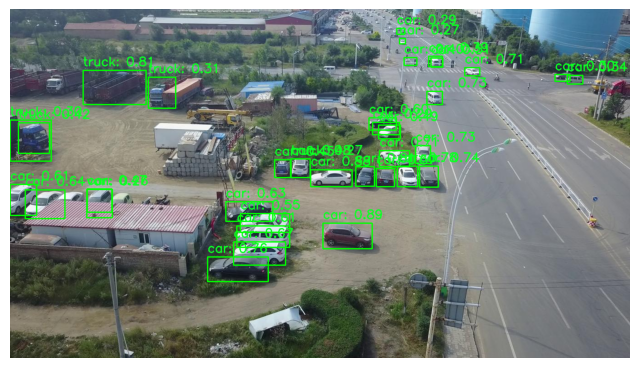


image 1/1 /kaggle/input/visdrone-dataset/VisDrone2019-DET-test-dev/VisDrone2019-DET-test-dev/images/0000054_00786_d_0000001.jpg: 384x640 98 pedestrians, 1 people, 1 car, 3 motors, 8.8ms
Speed: 3.1ms preprocess, 8.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)
Predicted Annotations:
Class: 0, Confidence: 0.9286619424819946, BBox: (253, 423, 291, 511)
Class: 0, Confidence: 0.897495448589325, BBox: (266, 270, 295, 334)
Class: 0, Confidence: 0.8936411142349243, BBox: (389, 141, 409, 194)
Class: 0, Confidence: 0.8752297759056091, BBox: (523, 164, 542, 214)
Class: 0, Confidence: 0.8328518867492676, BBox: (304, 303, 337, 370)
Class: 0, Confidence: 0.8173426389694214, BBox: (193, 299, 225, 360)
Class: 0, Confidence: 0.8092338442802429, BBox: (287, 221, 306, 267)
Class: 0, Confidence: 0.8017168641090393, BBox: (402, 234, 427, 293)
Class: 0, Confidence: 0.7984186410903931, BBox: (672, 254, 699, 315)
Class: 0, Confidence: 0.7945650219917297, BBox: (326, 203, 348, 257)
Class

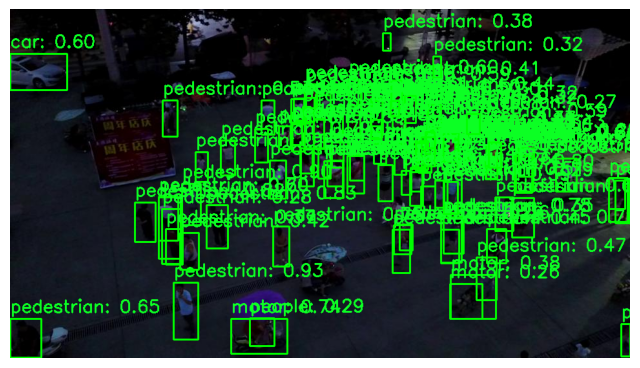

In [21]:
import os
import cv2
import matplotlib.pyplot as plt
# from ultralytics import YOLO

# Load the trained YOLOv8 model
model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')

listimg = ['0000006_00159_d_0000001','0000054_00786_d_0000001']
for img_locat in listimg:
    # Define the test image path
    # test_image_path = '/kaggle/input/custom-dataset/images/1001.jpg'
    test_image_path = '/kaggle/input/visdrone-dataset/VisDrone2019-DET-test-dev/VisDrone2019-DET-test-dev/images/'+ img_locat + '.jpg'

    # Load the test image
    img = cv2.imread(test_image_path)

    # Predict the bounding boxes
    results = model(test_image_path)

    # Print the predicted annotations
    print("Predicted Annotations:")
    for result in results:
        for bbox in result.boxes:
            bbox_array = bbox.xyxy[0].cpu().numpy()  # Convert to numpy array
            x1, y1, x2, y2 = map(int, bbox_array)  # Convert to integers
            class_id = int(bbox.cls)
            confidence = float(bbox.conf)
            print(f"Class: {class_id}, Confidence: {confidence}, BBox: {x1, y1, x2, y2}")
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(img, f'{model.names[class_id]}: {confidence:.2f}', (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

    # Display the images
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Prediction on Extended


image 1/1 /kaggle/input/extended-dataset/Expanded_dataset/images/1.jpg: 448x640 8 cars, 1 truck, 89.7ms
Speed: 2.4ms preprocess, 89.7ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)
Predicted Annotations:
Class: 3, Confidence: 0.8885661959648132, BBox: (660, 590, 772, 689)
Class: 3, Confidence: 0.8773506283760071, BBox: (590, 622, 677, 702)
Class: 3, Confidence: 0.6947910785675049, BBox: (411, 430, 490, 513)
Class: 3, Confidence: 0.6411869525909424, BBox: (571, 3, 601, 38)
Class: 5, Confidence: 0.5250430107116699, BBox: (507, 220, 583, 344)
Class: 3, Confidence: 0.4634890556335449, BBox: (463, 5, 495, 38)
Class: 3, Confidence: 0.46301716566085815, BBox: (0, 333, 76, 370)
Class: 3, Confidence: 0.31748950481414795, BBox: (944, 227, 976, 264)
Class: 3, Confidence: 0.2575565576553345, BBox: (496, 4, 524, 38)


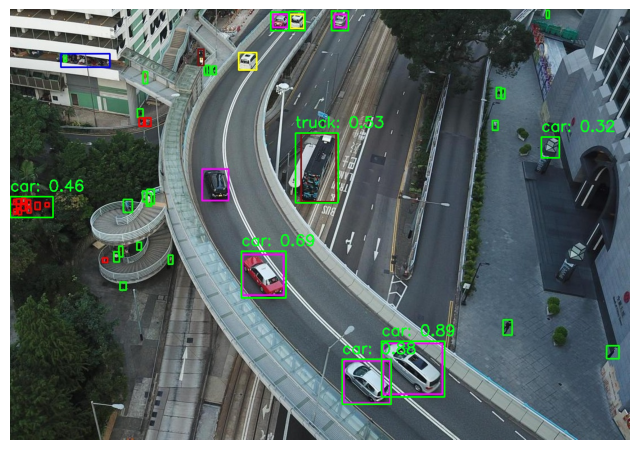


image 1/1 /kaggle/input/extended-dataset/Expanded_dataset/images/1011.jpg: 352x640 2 cars, 1 van, 1 truck, 1 bus, 67.0ms
Speed: 2.2ms preprocess, 67.0ms inference, 1.8ms postprocess per image at shape (1, 3, 352, 640)
Predicted Annotations:
Class: 5, Confidence: 0.7461051940917969, BBox: (653, 324, 714, 448)
Class: 3, Confidence: 0.7371662855148315, BBox: (137, 407, 212, 529)
Class: 3, Confidence: 0.6867915391921997, BBox: (0, 520, 88, 681)
Class: 4, Confidence: 0.3261573910713196, BBox: (214, 77, 267, 180)
Class: 8, Confidence: 0.29269352555274963, BBox: (216, 77, 350, 360)


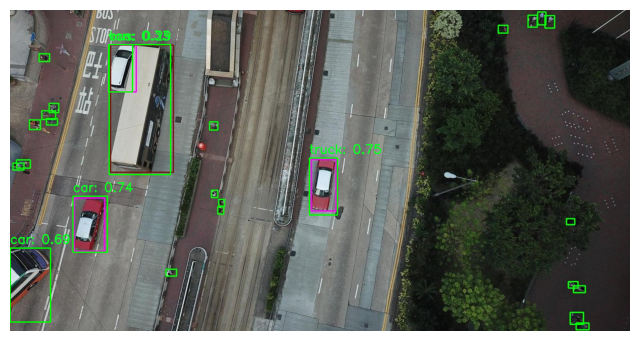


image 1/1 /kaggle/input/extended-dataset/Expanded_dataset/images/932.jpg: 352x640 1 truck, 1 bus, 7.8ms
Speed: 2.0ms preprocess, 7.8ms inference, 2.1ms postprocess per image at shape (1, 3, 352, 640)
Predicted Annotations:
Class: 8, Confidence: 0.4561523497104645, BBox: (595, 55, 624, 106)
Class: 5, Confidence: 0.3815494179725647, BBox: (263, 124, 320, 166)


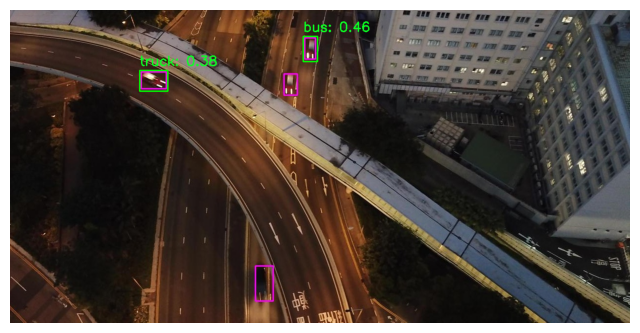


image 1/1 /kaggle/input/extended-dataset/Expanded_dataset/images/846.jpg: 352x640 11 cars, 1 truck, 1 bus, 9.0ms
Speed: 2.5ms preprocess, 9.0ms inference, 1.7ms postprocess per image at shape (1, 3, 352, 640)
Predicted Annotations:
Class: 3, Confidence: 0.8882799744606018, BBox: (613, 511, 794, 656)
Class: 3, Confidence: 0.8591263890266418, BBox: (556, 415, 690, 510)
Class: 3, Confidence: 0.8091933727264404, BBox: (641, 318, 697, 375)
Class: 3, Confidence: 0.6361650824546814, BBox: (514, 306, 577, 375)
Class: 8, Confidence: 0.625779390335083, BBox: (118, 274, 257, 349)
Class: 3, Confidence: 0.5229154825210571, BBox: (616, 250, 653, 286)
Class: 3, Confidence: 0.5044516324996948, BBox: (494, 232, 538, 275)
Class: 3, Confidence: 0.4508795142173767, BBox: (567, 201, 589, 222)
Class: 3, Confidence: 0.4389796555042267, BBox: (561, 228, 590, 257)
Class: 5, Confidence: 0.3435361385345459, BBox: (686, 263, 739, 305)
Class: 3, Confidence: 0.31117865443229675, BBox: (564, 223, 589, 244)
Class: 3

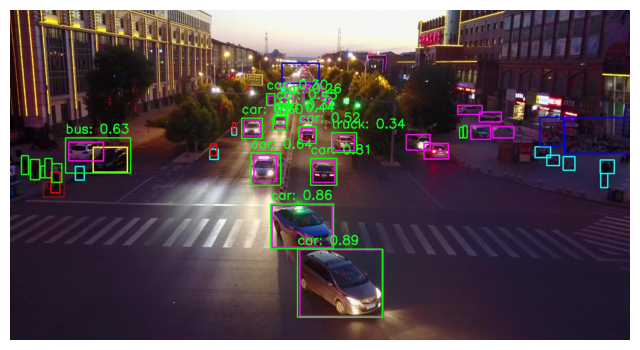


image 1/1 /kaggle/input/extended-dataset/Expanded_dataset/images/493.jpg: 320x640 5 cars, 2 buss, 65.7ms
Speed: 1.9ms preprocess, 65.7ms inference, 1.6ms postprocess per image at shape (1, 3, 320, 640)
Predicted Annotations:
Class: 3, Confidence: 0.603320300579071, BBox: (834, 549, 883, 569)
Class: 8, Confidence: 0.5940233469009399, BBox: (422, 3, 453, 63)
Class: 3, Confidence: 0.499162882566452, BBox: (436, 123, 462, 179)
Class: 8, Confidence: 0.37462544441223145, BBox: (987, 519, 1111, 554)
Class: 3, Confidence: 0.33515340089797974, BBox: (512, 238, 537, 294)
Class: 3, Confidence: 0.30081117153167725, BBox: (468, 358, 500, 412)
Class: 3, Confidence: 0.2551659941673279, BBox: (371, 213, 397, 262)


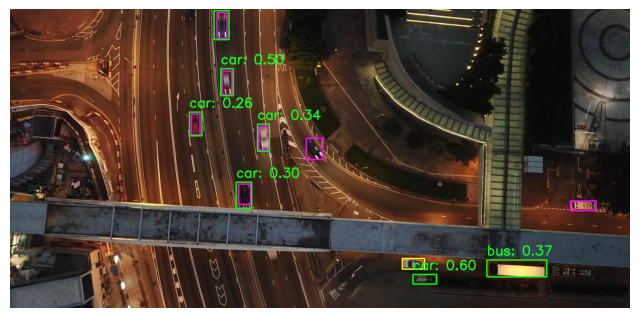

In [22]:
import os
import cv2
import matplotlib.pyplot as plt
# from ultralytics import YOLO

# Load the trained YOLOv8 model
model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')

listimg = [1,1011,932,846,493]
for img_locat in listimg:
    # Define the test image path
    # test_image_path = '/kaggle/input/custom-dataset/images/1001.jpg'
    test_image_path = '/kaggle/input/extended-dataset/Expanded_dataset/images/'+ str(img_locat) + '.jpg'

    # Load the test image
    img = cv2.imread(test_image_path)

    # Predict the bounding boxes
    results = model(test_image_path)

    # Print the predicted annotations
    print("Predicted Annotations:")
    for result in results:
        for bbox in result.boxes:
            bbox_array = bbox.xyxy[0].cpu().numpy()  # Convert to numpy array
            x1, y1, x2, y2 = map(int, bbox_array)  # Convert to integers
            class_id = int(bbox.cls)
            confidence = float(bbox.conf)
            print(f"Class: {class_id}, Confidence: {confidence}, BBox: {x1, y1, x2, y2}")
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(img, f'{model.names[class_id]}: {confidence:.2f}', (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

    # Display the images
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()